In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('./iris/iris.data', header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.columns = ['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm',
                'class']
data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.keys()

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isna().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

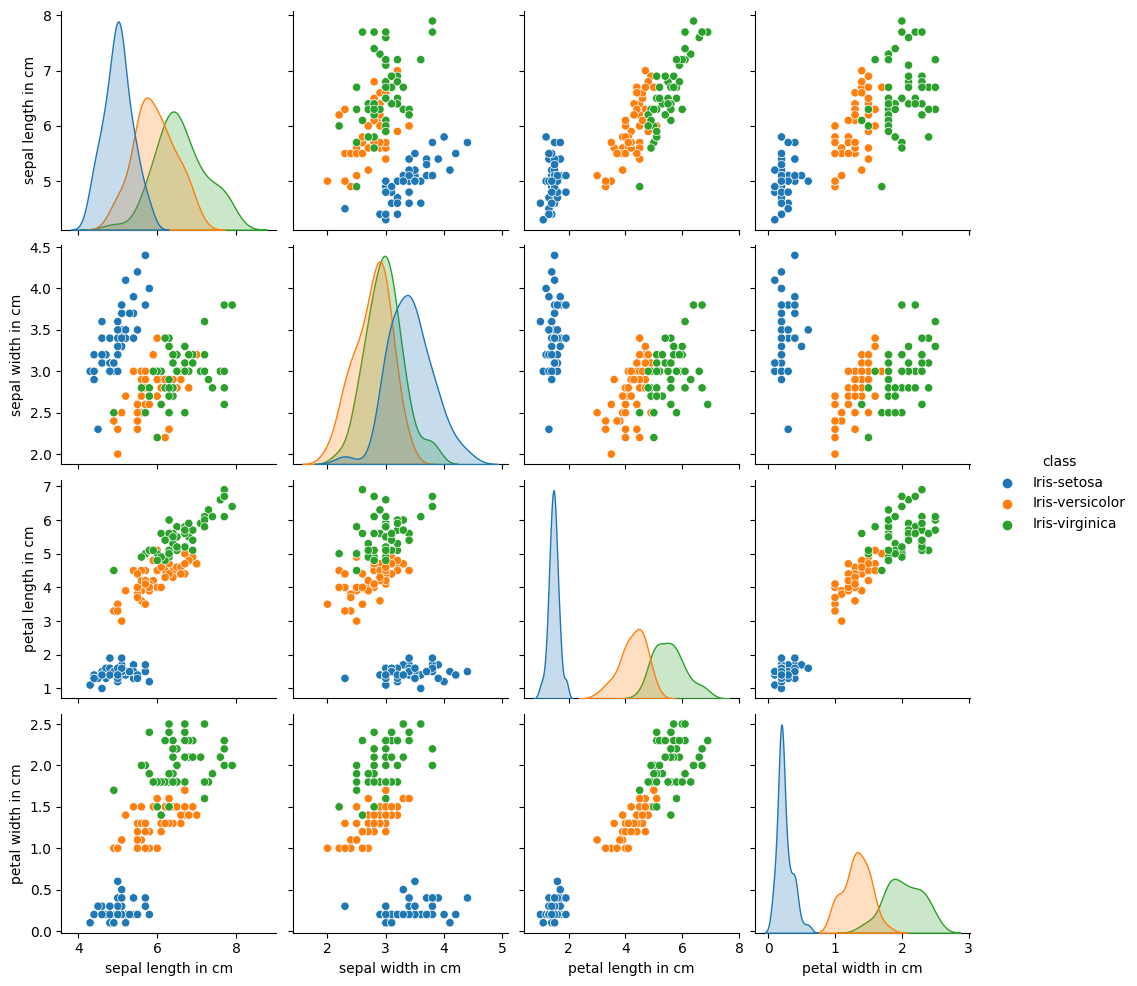

In [7]:
sns.pairplot(data, hue="class")  # "species"는 붓꽃의 종을 나타내는 열 이름입니다.
plt.show()

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel

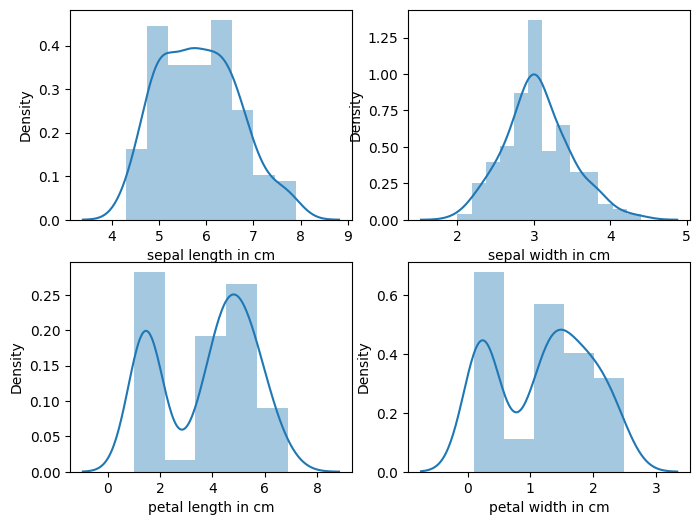

In [8]:
# EDA

f, axes = plt.subplots(2, 2, figsize=(8, 6))

sns.distplot(data['sepal length in cm'], ax=axes[0, 0])

sns.distplot(data['sepal width in cm'], ax=axes[0, 1])

sns.distplot(data['petal length in cm'], ax=axes[1, 0])

sns.distplot(data['petal width in cm'], ax=axes[1, 1])

plt.show()

<AxesSubplot:title={'center':'Analyze Correlation of Features'}>

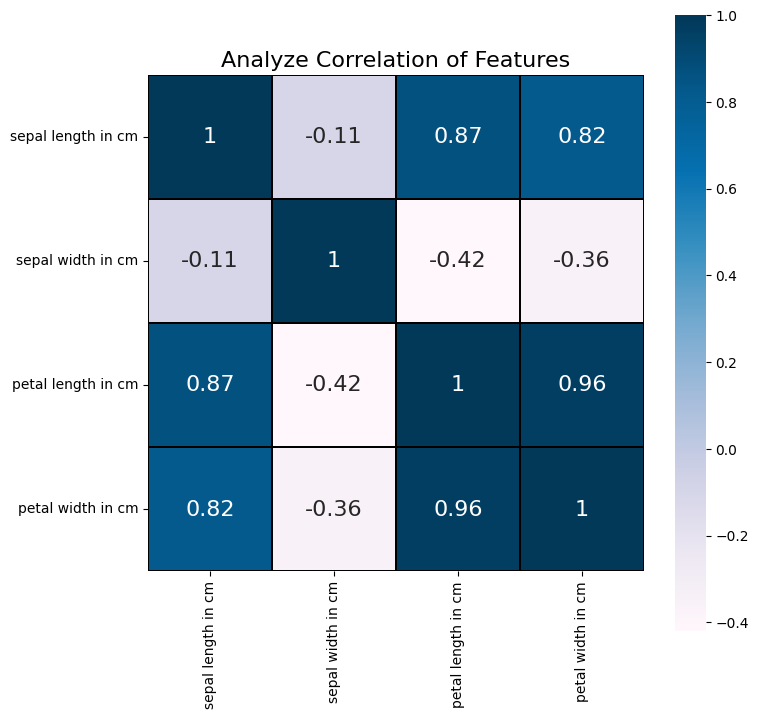

In [10]:
# heatmap
X = data.drop('class', axis=1)
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 8))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(X.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})

In [11]:
def remove_outliers(df, threshold=3):
    """
    각 특성에서 이상치를 확인하고 제거하는 함수

    Parameters:
    - df (DataFrame): 이상치를 제거할 데이터프레임
    - threshold (int or float): 이상치를 판단하기 위한 임계값 (기본값: 3)

    Returns:
    - cleaned_df (DataFrame): 이상치가 제거된 데이터프레임
    """
    cleaned_df = df.copy()
    
    for column in df.columns:
        if np.issubdtype(df[column].dtype, np.number):  # 숫자 타입인 열만 처리
            mean = df[column].mean()
            std = df[column].std()
            z_scores = (df[column] - mean) / std
            outliers = (z_scores.abs() > threshold)
            cleaned_df = cleaned_df[~outliers]
    
    return cleaned_df


In [12]:
data_cleaned = remove_outliers(data, threshold=3)
data_cleaned

c:\Users\OWNER\miniconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
X = data.drop(['petal width in cm', 'class'], axis=1)
y = data['petal width in cm']

In [14]:
# Min-Max 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf1 = DecisionTreeRegressor()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(clf1.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(y_pred1, y_test))
print('평균제곱근오차', mse)


0.9987417333733019
평균제곱근오차 0.28809720581775866


In [16]:
clf2 = SVR()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print(clf2.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(y_pred2, y_test))
print('평균제곱근오차', mse)

0.9554147992937354
평균제곱근오차 0.20825679731660388


In [17]:
clf3 = LinearRegression()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
print(clf3.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(y_pred3, y_test))
print('평균제곱근오차', mse)

0.9406642953714707
평균제곱근오차 0.21549501555731862


In [18]:
clf4 = RandomForestRegressor()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)
print(clf4.score(X_train, y_train))

mse = np.sqrt(mean_squared_error(y_pred4, y_test))
print('평균제곱근오차', mse)

0.9905202649150562
평균제곱근오차 0.20817307828959364
